# Homework 2

In [1]:
import dalex as dx
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# in order to simplify plots I decided to use only a subset of variables
data = data[['is_canceled', 'lead_time', 'arrival_date_year', 'adults', 'children', 'babies', 'booking_changes']]
data = data.dropna()
X, y = data.loc[:, data.columns != 'is_canceled'], data[['is_canceled']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [4]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [5]:
# making prediction on unseen data
observation = X_test.iloc[0,:].to_frame().transpose()
clf.predict(observation)

array([0], dtype=int64)

In [6]:
observation = pd.DataFrame({'lead_time': [203.0],
                       'arrival_date_year': [2016.0],
                       'adults': [2.0],
                       'children': [0.0],
                       'babies': [0.0],
                       'booking_changes': [4.]},
                      index = ['observation'])

In [6]:
exp = dx.Explainer(clf, X_train, y_train, label='random_forest')

Preparation of a new explainer is initiated

  -> data              : 107447 rows 6 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 107447 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : random_forest
  -> predict function  : <function yhat_proba_default at 0x0000027ABA9CB0D0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.139, mean = 0.37, max = 0.45
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.45, mean = -3.51e-05, max = 0.861
  -> model_info        : package sklearn

A new explainer has been created!


In [8]:
exp.predict(observation) # one more prediction

array([0.3079201])

In [9]:
lime = exp.predict_surrogate(observation)

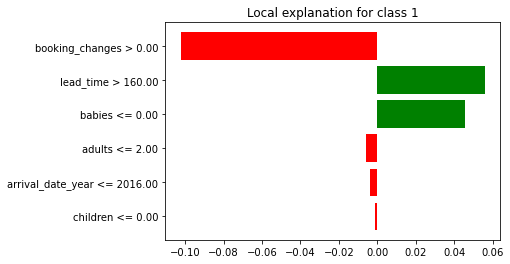

In [10]:
lime.plot()
# as it was already shown(see hw1) big(which is usually just being greater than 0) number of booking changes
# makes cancelation less likely
# although big time period before arrival and absence of babies make cancelation more likely

In [11]:
lime.result
# result attribute can give us more precise information on contributions

,variable,effect
0,booking_changes > 0.00,-0.102434
1,lead_time > 160.00,0.056035
2,babies <= 0.00,0.045443
3,adults <= 2.00,-0.006092
4,arrival_date_year <= 2016.00,-0.003575
5,children <= 0.00,-0.001196


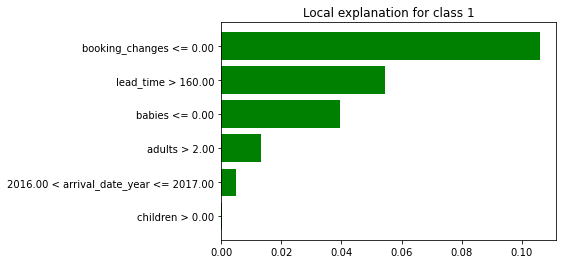

In [31]:
observation2 = pd.DataFrame({'lead_time': [332.0],
                       'arrival_date_year': [2017.0],
                       'adults': [3.0],
                       'children': [1.0],
                       'babies': [0.0],
                       'booking_changes': [0.0]},
                      index = ['observation2'])
lime2 = exp.predict_surrogate(observation2)
lime2.plot()
# as we can see this observation is perfect example of a guest whose every parameter makes cancelation more likely

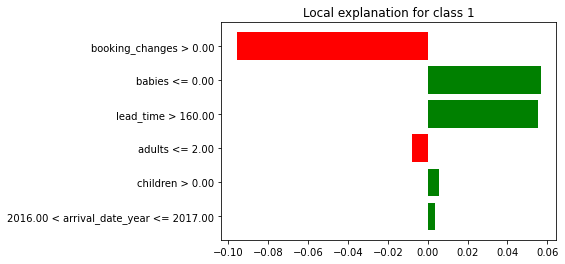

In [34]:
observation3 = pd.DataFrame({'lead_time': [203.0],
                       'arrival_date_year': [2017.0],
                       'adults': [2.0],
                       'children': [1.0],
                       'babies': [0.0],
                       'booking_changes': [1.0]},
                      index = ['observation3'])
lime3 = exp.predict_surrogate(observation3)
lime3.plot()
# same as all of the above

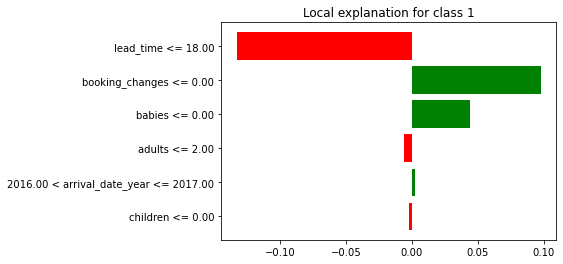

In [19]:
observation5 = pd.DataFrame({'lead_time': [203.0],
                       'arrival_date_year': [2017.0],
                       'adults': [2.0],
                       'children': [1.0],
                       'babies': [0.0],
                       'booking_changes': [0.0]},
                      index = ['observation5'])
lime5 = exp.predict_surrogate(observation5)
lime5.plot()
# one more indication that smaller lead time makes the cancelation less likely

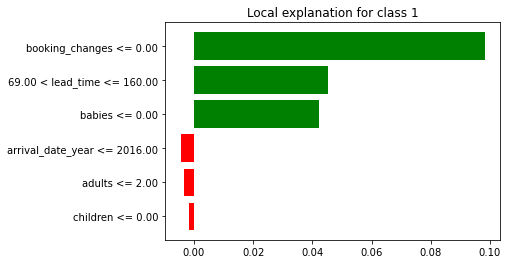

In [39]:
observation4 = pd.DataFrame({'lead_time': [82.0],
                       'arrival_date_year': [2015.0],
                       'adults': [2.0],
                       'children': [0.0],
                       'babies': [0.0],
                       'booking_changes': [0.0]},
                      index = ['observation4'])
lime4 = exp.predict_surrogate(observation4)
lime4.plot()

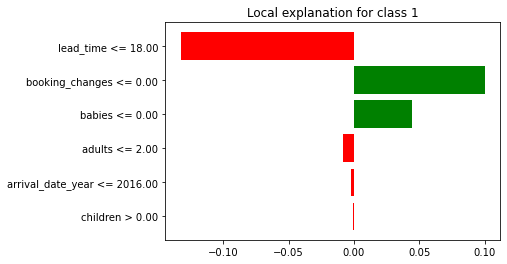

In [11]:
observation6 = pd.DataFrame({'lead_time': [14.0],
                       'arrival_date_year': [2015.0],
                       'adults': [2.0],
                       'children': [2.0],
                       'babies': [0.0],
                       'booking_changes': [0.0]},
                      index = ['observation6'])
lime6 = exp.predict_surrogate(observation6)
lime6.plot()

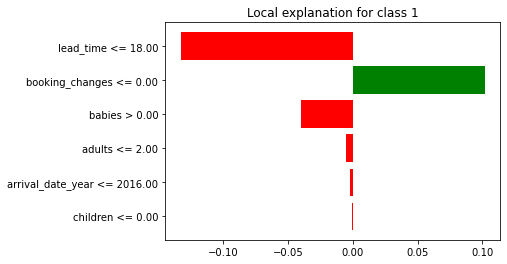

In [12]:
observation7 = pd.DataFrame({'lead_time': [14.0],
                       'arrival_date_year': [2015.0],
                       'adults': [2.0],
                       'children': [0.0],
                       'babies': [2.0],
                       'booking_changes': [0.0]},
                      index = ['observation7'])
lime7 = exp.predict_surrogate(observation7)
lime7.plot()
# On this and the previous plot all variables have same values and only number of children and babies differ
# (2 and 0 in first case and vice versa in second)
# One can notice that babies contribute much stronger than children
# Moreover children in family without babies can contribute positively to the result (see plot below)

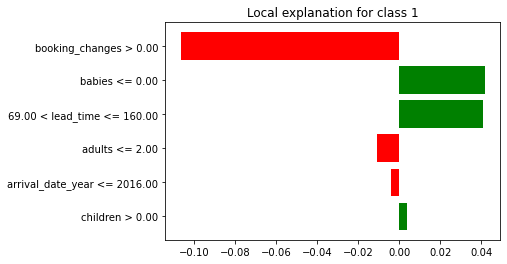

In [15]:
observation8 = pd.DataFrame({'lead_time': [100.0],
                       'arrival_date_year': [2015.0],
                       'adults': [2.0],
                       'children': [2.0],
                       'babies': [0.0],
                       'booking_changes': [4.0]},
                      index = ['observation8'])
lime8 = exp.predict_surrogate(observation8)
lime8.plot()

## Summary
On every plot there is usually one main variable with the most influence(positive or negative) on the result. Those are usually the number of booking changes(especially when it's bigger than 0) or the time before arrival(lead time). Other variables usually do not have strong contributions and their positivity or negativity depends on values of the main variables.